## **Comparison of clustering algorithms:**
## By **Anwar Hashem** (PhD Student)
## Clustering with  a synthetic dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.metrics import pairwise_distances_argmin
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, Birch, MeanShift, AffinityPropagation

In [ ]:
# ########################################################################
# Generate a synthetic data
## temp np.random.seed(0)


centers_s =[[1, 1], [-1, -1], [1, -1]]
#n_clusters_s = len(centers_s)
Xtr, labels_true = make_blobs(n_samples=750, centers=centers_s, cluster_std=0.4, random_state=0)

Xtr_s = StandardScaler().fit_transform(Xtr)

# buali Xtr1, labels_true = make_blobs(n_samples=300, centers=4, random_state=42)
## temp Xtr_s, labels_true = make_blobs(n_samples=3000, centers=7, cluster_std=0.7)

# Generate synthetic data with two crescent moons
#Xtr_s, _ = make_moons(n_samples=2000, noise=0.05, random_state=42)
## centers_s = [[1, 1], [-1, -1], [1, -1]]
## Xtr_s, _ = make_moons(n_samples=2000, noise=0.05, random_state=0)

Xtr_s.shape
labels_true

array([0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1,
       1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2,
       1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2,
       2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1,
       1, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1,
       1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1,
       2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1,
       1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 2,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0,

In [ ]:
Xtr_s

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

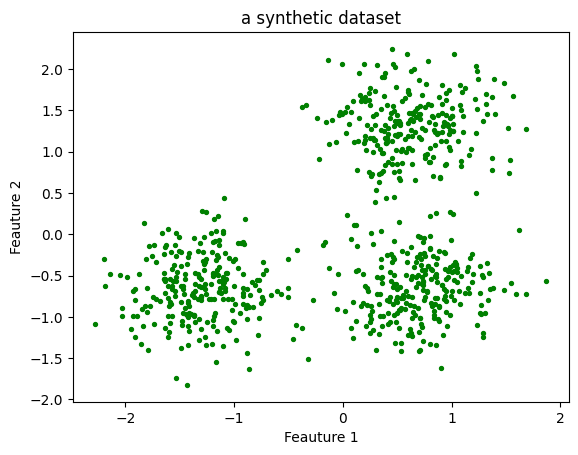

In [ ]:
#see it using a scatter plot:
#plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'r')
#plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'b')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'g')


plt.scatter(Xtr_s[:,0],Xtr_s[:,1] ,c ='g' , s = 8)
#plt.scatter(Xtr_s[:,0],Xtr_s[:,1] ,c ='b' , s = 10)


#for j in range(len(centers)):
 #   plt.scatter(centers[j,0],centers[j,1] ,c ='r' , s = 100)
plt.title('a synthetic dataset')
plt.xlabel('Feauture 1')
plt.ylabel('Feauture 2')
plt.show()


#plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 100, c = 'y')
#plt.show()

Cluster=Inertia
1      1500.0000000000005
2      688.5514317623766
3      212.39132249472704
4      186.47680425058175
5      160.92816908443052
6      135.94353870260224
7      119.64637940352945
8      104.54562076922966
9      91.06248536714175
10      84.4311847810131
11      78.19712562104492
12      72.73369702281846
13      67.92875101940045
14      63.66003078837082
15      58.69171872194012
16      55.14375869306197
17      52.01506929599255
18      49.22686794249268
19      45.92769685091635


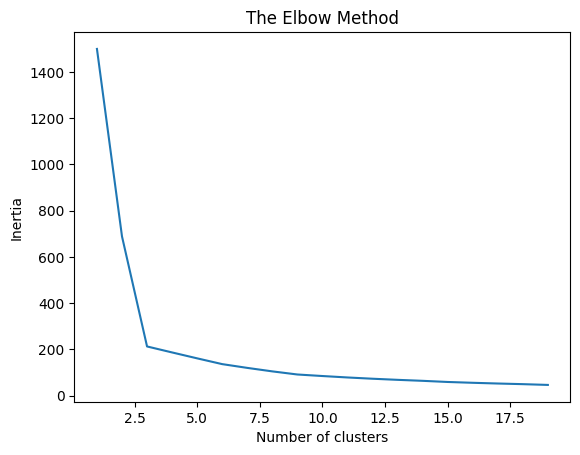

In [ ]:
# By first looking at the data plotو  we find that the appropriate value for the number of clusters is:
n_clusters_s=6


#To be more sure, we will aplay the Elbow method
# The Elbow Method
inertia_val_s=[]
print('Cluster=Inertia')
n=20
for i in range(1,n):
    #km_s = KMeans(n_clusters= n )
    km_s= KMeans(init='k-means++', n_clusters=i, n_init=10, random_state=0)
    km_s.fit(Xtr_s)
    inertia_val_s.append(km_s.inertia_)
    print(i , '    '  , km_s.inertia_)


plt.plot(range(1,n) , inertia_val_s)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

init= Cluster=silhouette_score
2      0.516770439467514
3      0.6496075455022047
4      0.5284424011981419
5      0.4350679013700156
6      0.3357384295501986
7      0.34105582525211053
8      0.34604909633834857
9      0.3509831936861054
10      0.3438747434830266
11      0.3283462143194826
12      0.3327050661679321
13      0.3288415676847879
14      0.3269644635863914
15      0.3333055280750118
16      0.33690358902005996
17      0.3410060973531852
18      0.333109421312844
19      0.3338489116785183


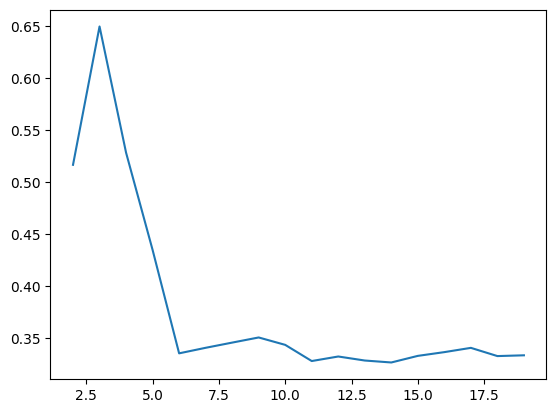

In [ ]:
score_s = []
print('init= Cluster=silhouette_score')
n=20
for i in range(2,n):
  km_s = KMeans(n_clusters= i )
  #km_s= KMeans(init='random', n_clusters=i, n_init=10, random_state=0)
  #km_s= KMeans(init='k-means++', n_clusters=i, n_init=10, random_state=0)

  km_s.fit(Xtr_s)
  result = km_s.labels_
  print(i , '    '  , silhouette_score(Xtr_s , result))
  score_s.append(silhouette_score(Xtr_s , result))

plt.plot(range(2,n) , score_s)
plt.show()

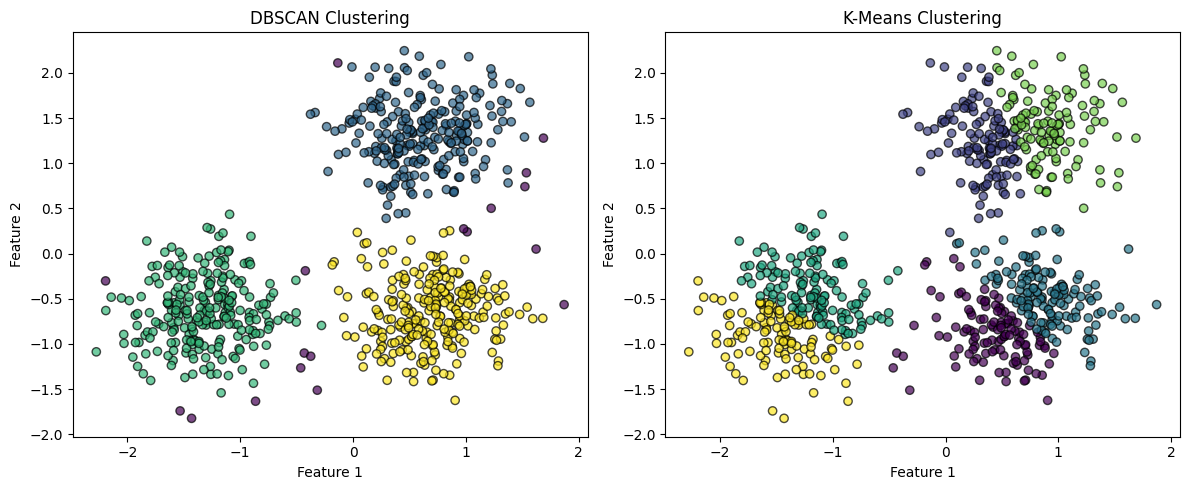

In [ ]:
#From the figure above, we find that the appropriate value for the number of clusters is: 6
n_clusters_s=6

# Perform K-Means clustering
#km_s = KMeans(n_clusters=7)
km_s= KMeans(init='k-means++', n_clusters=n_clusters_s, n_init=10, random_state=0)
km_s_labels = km_s.fit_predict(Xtr_s)

# Plot the data points and cluster assignments for K-Means
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.scatter(Xtr_s[:, 0], Xtr_s[:, 1], c=km_s_labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


# Perform DBSCAN clustering
dbscan_s = DBSCAN(eps=0.3, min_samples=10)
dbscan_s_labels = dbscan_s.fit_predict(Xtr_s)

# Plot the data points and cluster assignments for DBSCAN


plt.subplot(1, 2, 1)
plt.scatter(Xtr_s[:, 0], Xtr_s[:, 1], c=dbscan_s_labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


plt.tight_layout()
plt.show()

In [ ]:
# ##################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Xtr_s)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0,  2,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2,  0,  1,  0,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2,  2,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  2,  2,
        2,  2,  1,  2,  2

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(Xtr_s, labels))



Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


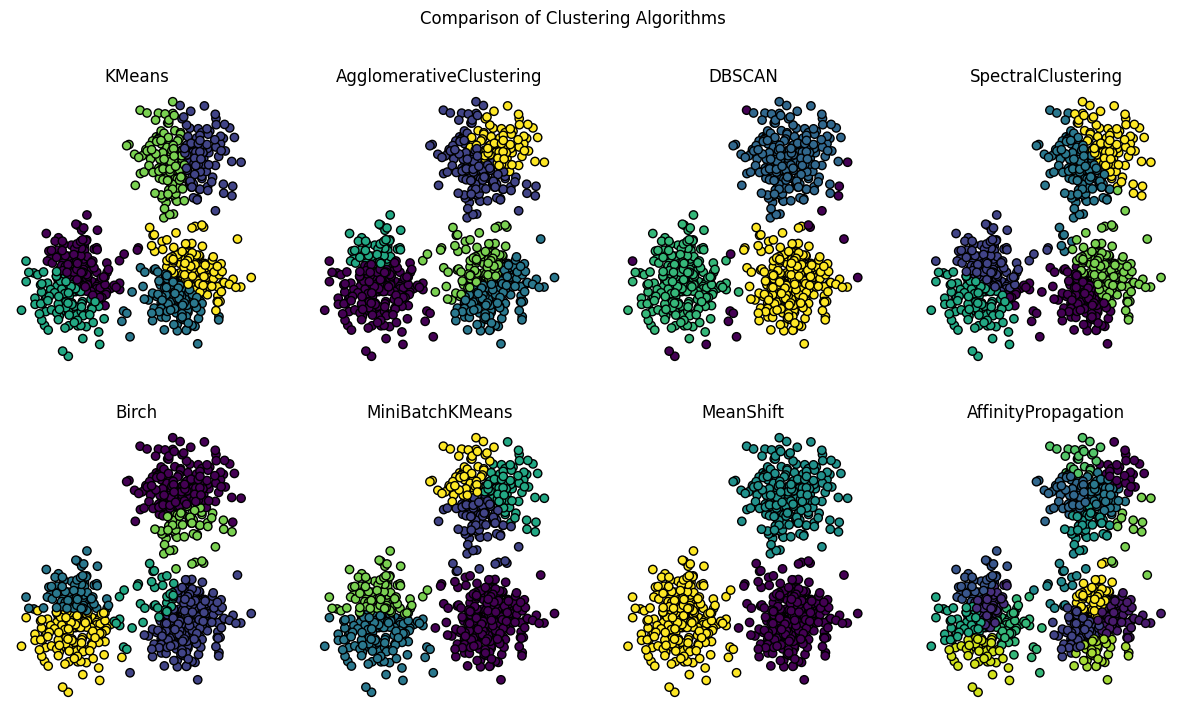

In [ ]:
# Define clustering algorithms

algorithms = [
    KMeans(n_clusters=n_clusters_s),
    AgglomerativeClustering(n_clusters=n_clusters_s),
    DBSCAN(eps=0.3, min_samples=10),
    SpectralClustering(n_clusters=n_clusters_s),
    Birch(n_clusters=n_clusters_s),
    MiniBatchKMeans(n_clusters=n_clusters_s),
    MeanShift(),
    AffinityPropagation()
]

# Compare clustering algorithms
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Comparison of Clustering Algorithms')

for ax, algorithm in zip(axes.flatten(), algorithms):
    # Fit the model
    if algorithm.__class__.__name__ == 'MeanShift' or algorithm.__class__.__name__ == 'AffinityPropagation':
        labels = algorithm.fit_predict(Xtr_s)
    else:
        labels = algorithm.fit_predict(Xtr_s)

    # Plot the results
    ax.scatter(Xtr_s[:, 0], Xtr_s[:, 1], c=labels, cmap='viridis', edgecolors='k')
    ax.set_title(algorithm.__class__.__name__)
    ax.axis('off')

plt.show()


The above results show that
DBSCAN algorithm is more accurate. Also it deleted some data and considered it an outlier. Next comes MeanShift

SpectralClustering and AgglomerativeClustering are close.
The results of KMeans and SpectralClustering are close

Birch and MiniBatchKMeans almost are close.